In [1]:
import os, shutil

Make Directory

-train
    
    -train/cat

    -train/dog

-val

    -val/cat

    -val/dog

In [1]:
train_dir = 'train'
val_dir = 'val'
train_cat_dir = 'train/cat'
train_dog_dir = 'train/dog'
val_cat_dir = 'val/cat'
val_dog_dir = 'val/dog'

#os.mkdir(val_dir)
#os.mkdir(train_cat_dir)
#os.mkdir(train_dog_dir)
#os.mkdir(val_cat_dir)
#os.mkdir(val_dog_dir)

In [4]:
#max([int(file_.split('.')[1]) for file_ in os.listdir(original_dataset_dir)])

In [19]:
file_list = [file_ for file_ in os.listdir(train_dir) if os.path.isfile(train_dir+'/'+file_)]
for file_ in file_list:
    if int(file_.split('.')[1])<10000:
        if file_.split('.')[0]=='cat':
            shutil.copyfile(train_dir+'/'+file_, train_cat_dir+'/'+file_)
        else:
            shutil.copyfile(train_dir+'/'+file_, train_dog_dir+'/'+file_)
    else:
        if file_.split('.')[0]=='cat':
            shutil.copyfile(train_dir+'/'+file_, val_cat_dir+'/'+file_)
        else:
            shutil.copyfile(train_dir+'/'+file_, val_dog_dir+'/'+file_)        

Build Model

In [2]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [3]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

Read from file

In [4]:
import tensorflow.keras as keras

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
      rotation_range=40,
      zoom_range=0.2,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest',
      rescale=1./255)

train_generator = datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

validation_generator = datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=50,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
for X,y in train_generator:
    model.train_on_batch(X,y)
    break

In [ ]:
import time
start = time.time()
history = model.fit_generator(
          train_generator,
          steps_per_epoch=20000/50,
          epochs=1,
          use_multiprocessing=True,workers=4)
end = time.time()
print(end - start)

Epoch 1/1


In [ ]:
import time
start = time.time()
history = model.fit_generator(
          train_generator,
          steps_per_epoch=20000/50,
          epochs=1)
end = time.time()
print(end - start)

Epoch 1/1


In [1]:
from PIL import Image

In [10]:
import cv2

In [51]:
from tensorflow.keras.preprocessing import image

In [16]:
import numpy as np

In [11]:
file_ = train_cat_dir+'/'+os.listdir(train_cat_dir)[0]
cv_img = cv2.imread(file_)
pil_img = Image.open(file_)

In [55]:
%timeit cv2.imread(file_)

272 µs ± 4.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [56]:
%timeit np.asarray(Image.open(file_))

502 µs ± 11.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [57]:
%timeit np.array(Image.open(file_))

507 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [58]:
%timeit np.array(image.load_img(file_))

510 µs ± 10.7 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [41]:
import matplotlib.pyplot as plt

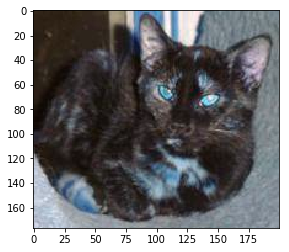

In [47]:
plt.imshow(cv_img)

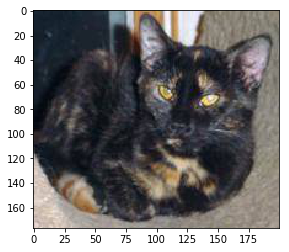

In [48]:
plt.imshow(np.array(Image.open(file_)))

In [44]:
np.all(np.asarray(Image.open(file_)) == np.array(Image.open(file_)))

True

In [61]:
type(image.load_img(file_))

PIL.JpegImagePlugin.JpegImageFile

In [7]:
import PIL

In [8]:
PIL.__version__

'5.3.0'